# Cartao Credito - Dados Desbalanceados


Neste dataset temos um problema de classificação com target desbalanceada, 
então foi utilizado o undersampling e o oversampling para comparar qual obteve melhor resultado

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df = df[['V1','V2','V3','V4','V5','Amount','Class']]

In [3]:
df

,V1,V2,V3,V4,V5,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0
...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,10.00,0


In [4]:
df.shape

(284807, 7)

In [5]:
df.dropna(inplace=True)
df.shape

(284807, 7)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\janaina\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


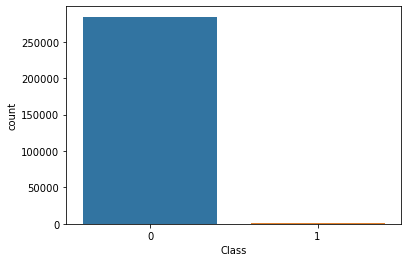

In [7]:
sns.countplot(df['Class']);

In [8]:
len(df.columns)

7

In [9]:
# formato necessario para maioria dos algoritmos
X = df.iloc[:,0:6].values
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
         1.37815522e+00, -3.38320770e-01,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01,
         4.48154078e-01,  6.00176493e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00,
         3.79779593e-01, -5.03198133e-01,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00,
        -5.57828125e-01,  2.63051512e+00,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01,
         6.89799168e-01, -3.77961134e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01,
        -5.06271240e-01, -1.25456788e-02,  2.17000000e+02]])

In [10]:
y = df.iloc[:,6].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([284315,    492], dtype=int64))

## Base de Treinamento e Teste

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)
X_treinamento.shape, y_treinamento.shape

((227845, 6), (227845,))

In [14]:
X_teste.shape, y_teste.shape

((56962, 6), (56962,))

## Classificação Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [16]:
modelo = RandomForestClassifier()

In [ ]:
modelo.fit(X_treinamento, y_treinamento)

In [ ]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

In [ ]:
cm = confusion_matrix(previsoes, y_teste)
cm

In [ ]:
# porcentagem de dados que o modelo acertou
56859 / (56859 + 38)

In [ ]:
# Classe minoritária geralmente é a classe que precisamos de maior acertividade, porse tratar da classe de mais impacto.
# porcentagem de dados que o modelo acertou
60 / (60 +5)

## Subamostragem (undersampling) - Tomek links

https://imbalanced-learn.org/stable/user_guide.html

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [ ]:
X_under.shape, y_under.shape

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
np.unique(y_under, return_counts=True)

In [ ]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size = 0.2, stratify = y_under)
X_treinamento_u.shape, X_teste_u.shape

In [ ]:
# aplicando RandomForestClassifier nos dados undersampling
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

In [ ]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

In [ ]:
# porcentagem de dados que o modelo acertou
56846 / (56846 + 49)

In [ ]:
# Classe minoritária geralmente é a classe que precisamos de maior acertividade, porse tratar da classe de mais impacto.
# porcentagem de dados que o modelo acertou
49 / (49 + 7)

## Sobreamostragem (oversampling) - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [ ]:
X_over.shape, y_over.shape

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
np.unique(y_over, return_counts=True)

In [ ]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, 
                                                                          test_size = 0.2, stratify = y_over)
X_treinamento_o.shape, X_teste_o.shape

In [ ]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

In [ ]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

In [ ]:
# porcentagem de dados que o modelo acertou
56766 / (56766 + 8)

In [ ]:
# Classe minoritária geralmente é a classe que precisamos de maior acertividade, porse tratar da classe de mais impacto.
# porcentagem de dados que o modelo acertou
56855 / (56855 + 97)